In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

In [121]:
df = pd.read_csv(r"E:\kritsnam data\CWC-01.csv")
df.drop(columns = {'Timestamp', 'Flagged'}, inplace = True)
df.head()

,Water Level(In mm)
0,5645.0
1,5646.0
2,5642.0
3,5650.0
4,5650.0


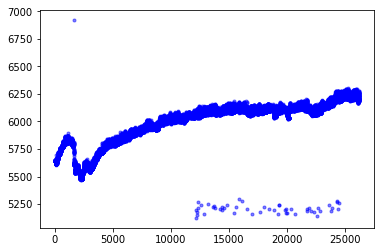

In [156]:
plt.plot(df['Water Level(In mm)'], 'b.', alpha = 0.5)

In [194]:
T = df.iloc[:, 0].values
def feature_extract(i, T):
    d_original = T[i]
    window_left = T[i-3:i]
    window_right = T[i:i+3]
    wt_right = np.arange(3, 0, -1)
    wt_left = np.arange(1, 4, 1)
    d_estimate = ((window_left*wt_left).sum() + (window_right*wt_right).sum())/(wt_left.sum()+wt_right.sum())
    pci_l = d_estimate - t.ppf(0.90, df = 2*3-1)*(np.sqrt(1+1/(2*3)))*np.std(np.hstack((window_left, window_right)))
    pci_r = d_estimate + t.ppf(0.90, df = 2*3-1)*(np.sqrt(1+1/(2*3)))*np.std(np.hstack((window_left, window_right)))
    state = 0
    if (d_original<pci_l) or (d_original>pci_r):
        state = 1    
    dat = [d_original, d_estimate, pci_l, pci_r, state]
    return dat
fin = [feature_extract(i, T) for i in range(3, len(T)-3)]

In [192]:
np.arange(3, 23, dtype = np.int64)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22], dtype=int64)

In [181]:
df2 = pd.DataFrame(fin, columns = ['Original', 'Estimated', 'Lower', 'Upper', 'Status'])
print((df2[df2['Status']==1]).head())
print((df2[df2['Status']==0]).head())

    Original    Estimated        Lower        Upper  Status
14    5644.0  5642.083333  5640.489196  5643.677470       1
20    5643.0  5640.083333  5637.480119  5642.686548       1
42    5648.0  5643.583333  5639.424635  5647.742032       1
48    5647.0  5642.916667  5639.503823  5646.329510       1
53    5640.0  5641.750000  5640.048757  5643.451243       1
   Original    Estimated        Lower        Upper  Status
0    5650.0  5646.750000  5642.202128  5651.297872       0
1    5650.0  5647.333333  5641.993041  5652.673626       0
2    5648.0  5647.083333  5641.683885  5652.482782       0
3    5642.0  5645.666667  5638.672419  5652.660914       0
4    5645.0  5643.333333  5635.651276  5651.015390       0


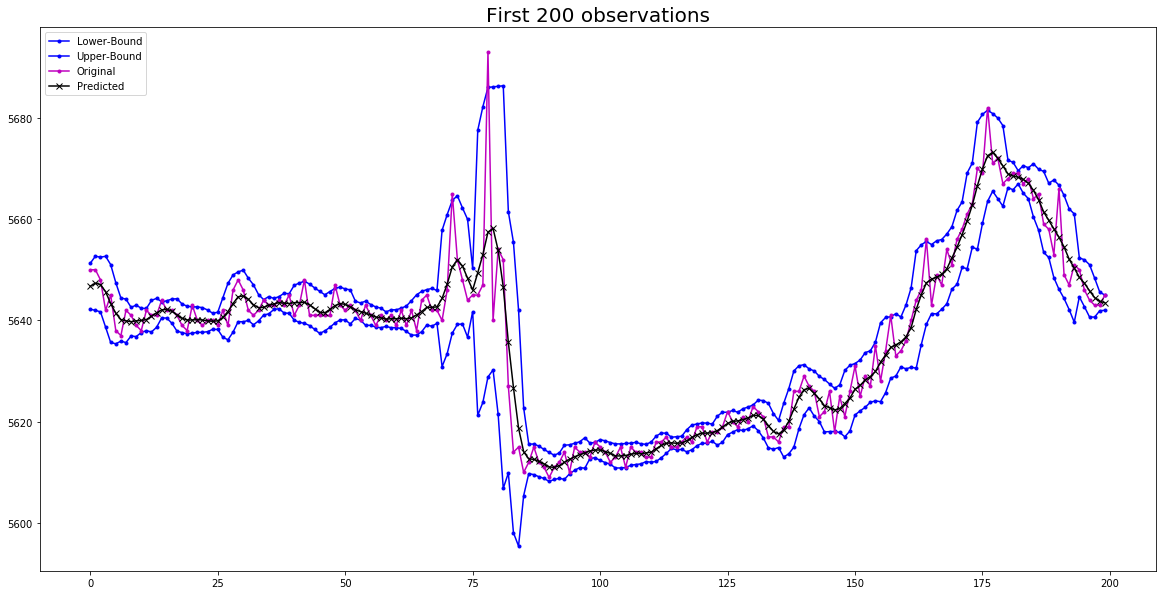

In [201]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.plot(df2['Lower'].values[0:200], 'b.-', label = "Lower-Bound")
ax.plot(df2['Upper'].values[0:200], 'b.-', label = "Upper-Bound")
ax.plot(df2['Original'].values[0:200], 'm.-', label = "Original")
ax.plot(df2['Estimated'].values[0:200], 'k-x', label = "Predicted")
ax.set_title('First 200 observations', size = 20)
ax.legend(loc = "upper left")

3296